In [1]:
#Notes: 
#Use for loop for order on ARIMA model
#ARIMA steps:
## plot data
## dickey fuller test
## remove trends
## ACF, PACF
## write for loop to determine order 
## 

In [ ]:
#Steps for each zipcode:
## process data
## plot data
## dickey fuller test
## remove trends
## plot acf, pacf
## run for loop 
## make 5 year prediction
## run percentage

# Mod 4 Project - Starter Notebook

This notebook has been provided to you so that you can make use of the following starter code to help with the trickier parts of preprocessing the Zillow dataset. 

The notebook contains a rough outline the general order you'll likely want to take in this project. You'll notice that most of the areas are left blank. This is so that it's more obvious exactly when you should make use of the starter code provided for preprocessing. 

**_NOTE:_** The number of empty cells are not meant to infer how much or how little code should be involved in any given step--we've just provided a few for your convenience. Add, delete, and change things around in this notebook as needed!

# Some Notes Before Starting

This project will be one of the more challenging projects you complete in this program. This is because working with Time Series data is a bit different than working with regular datasets. In order to make this a bit less frustrating and help you understand what you need to do (and when you need to do it), we'll quickly review the dataset formats that you'll encounter in this project. 

## Wide Format vs Long Format

If you take a look at the format of the data in `zillow_data.csv`, you'll notice that the actual Time Series values are stored as separate columns. Here's a sample: 

<img src='~/../images/df_head.png'>

You'll notice that the first seven columns look like any other dataset you're used to working with. However, column 8 refers to the median housing sales values for April 1996, column 9 for May 1996, and so on. This This is called **_Wide Format_**, and it makes the dataframe intuitive and easy to read. However, there are problems with this format when it comes to actually learning from the data, because the data only makes sense if you know the name of the column that the data can be found it. Since column names are metadata, our algorithms will miss out on what dates each value is for. This means that before we pass this data to our ARIMA model, we'll need to reshape our dataset to **_Long Format_**. Reshaped into long format, the dataframe above would now look like:

<img src='~/../images/melted1.png'>

There are now many more rows in this dataset--one for each unique time and zipcode combination in the data! Once our dataset is in this format, we'll be able to train an ARIMA model on it. The method used to convert from Wide to Long is `pd.melt()`, and it is common to refer to our dataset as 'melted' after the transition to denote that it is in long format. 

# Helper Functions Provided

Melting a dataset can be tricky if you've never done it before, so you'll see that we have provided a sample function, `melt_data()`, to help you with this step below. Also provided is:

* `get_datetimes()`, a function to deal with converting the column values for datetimes as a pandas series of datetime objects
* Some good parameters for matplotlib to help make your visualizations more readable. 

Good luck!


# Step 1: Load the Data/Filtering for Chosen Zipcodes

In [182]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [3]:
df = pd.read_csv("zillow_data.csv")
df.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500


In [4]:
df['RegionName'].nunique()

14723

Regions of Colorado: 
1. 81521
2. 81524 
3. 81525 
4. 81507
5. 81505
6. 81501
7. 81401
8. 81301
9. 81321
10. 80206
11. 80011
12. 80303
13. 80301
14. 80302
15. 80903

In [6]:
colorado = pd.DataFrame()

In [7]:
zipcodes = [81521, 81524, 81525, 81507, 81505, 81501, 81401, 81301, 81321, 80206,
           80011, 80303, 80301, 80302, 80903]

In [38]:
colorado = df.loc[(df["RegionName"] == 81521) | (df["RegionName"] == 81520) | (df["RegionName"] == 81525) | 
                  (df["RegionName"] == 81507) | (df["RegionName"] == 81505) | (df["RegionName"] == 81501) | 
                  (df["RegionName"] == 81401) | (df["RegionName"] == 81301) | (df["RegionName"] == 81321) | 
                  (df["RegionName"] == 80206) | (df["RegionName"] == 80011) | (df["RegionName"] == 80303) | 
                  (df["RegionName"] == 80301) | (df["RegionName"] == 80302) | (df["RegionName"] == 80903)]

colorado

,RegionName,City,State,Metro,CountyName,1996-04,1996-05,1996-06,1996-07,1996-08,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
1201,80011,Aurora,CO,Denver,Arapahoe,90400.0,90600.0,90900.0,91100.0,91500.0,...,269000,271900,274900,277500,280300,283700,286400,289300,293400,296400
2330,80206,Denver,CO,Denver,Denver,182300.0,183000.0,183900.0,185000.0,186300.0,...,725400,725300,726400,729700,733200,738700,744900,751900,759500,765600
2652,81301,Durango,CO,Durango,La Plata,153900.0,153100.0,152500.0,152000.0,151900.0,...,445400,449700,455000,456600,450300,453300,464200,463700,452500,449200
3225,80302,Boulder,CO,Boulder,Boulder,296600.0,295400.0,294100.0,292800.0,291600.0,...,874100,877900,881500,885800,888700,889400,890700,897100,908000,915100
3363,80303,Boulder,CO,Boulder,Boulder,231100.0,230300.0,229500.0,228700.0,228000.0,...,710400,708000,707300,711400,714700,715600,717300,724100,732800,737100
3382,80301,Boulder,CO,Boulder,Boulder,218000.0,217600.0,217200.0,216700.0,216200.0,...,645000,646800,648800,651000,653000,656400,660000,663600,668000,670700
4448,81501,Grand Junction,CO,Grand Junction,Mesa,74500.0,75100.0,75800.0,76400.0,76900.0,...,175600,176700,177600,178000,178800,179800,180500,182100,184700,186300
4503,81401,Montrose,CO,Montrose,Montrose,97800.0,97600.0,97200.0,96600.0,95900.0,...,214300,215800,217200,218000,218100,217100,216700,214700,209700,204800
6410,80903,Colorado Springs,CO,Colorado Springs,El Paso,87700.0,88100.0,88500.0,88900.0,89400.0,...,227800,230600,233400,236100,238300,240700,243500,246300,249300,251200
6485,81321,Cortez,CO,NaN,Montezuma,75200.0,75200.0,75100.0,75100.0,75100.0,...,174400,174500,173000,171200,170600,171500,172800,172800,172600,172900


In [ ]:
#noteworthy = there's only 13 rows because Mack (presumably) had no data. not surprising. 


In [43]:
aurora = colorado.loc[colorado["RegionName"] == 80011]
denver = colorado.loc[colorado["RegionName"] == 80206]
durango = colorado.loc[colorado["RegionName"] == 81301]
boulder_1 = colorado.loc[colorado["RegionName"] == 80301]
boulder_2 = colorado.loc[colorado["RegionName"] == 80302]
boulder_3 = colorado.loc[colorado["RegionName"] == 80303]
grand_junction_1 = colorado.loc[colorado["RegionName"] == 81501]
montrose = colorado.loc[colorado["RegionName"] == 81401]
colorado_springs = colorado.loc[colorado["RegionName"] == 80903]
cortez = colorado.loc[colorado["RegionName"] == 81321]
grand_junction_2 = colorado.loc[colorado["RegionName"] == 81507]
fruita = colorado.loc[colorado["RegionName"] == 81521]
clifton = colorado.loc[colorado["RegionName"] == 81520]
grand_junction_3 = colorado.loc[colorado["RegionName"] == 81505]

In [ ]:
#i believe i need to run an arima for each and every one of these. hot damn. 

# Step 2: Data Preprocessing

In [19]:
def get_datetimes(df):
    return pd.to_datetime(df.columns.values[7:], format='%Y-%m')

In [136]:
get_datetimes(aurora)
get_datetimes(denver)
get_datetimes(durango)
get_datetimes(boulder_1)
get_datetimes(boulder_2)
get_datetimes(boulder_3)
get_datetimes(grand_junction_1)
get_datetimes(montrose)
get_datetimes(colorado_springs)
get_datetimes(cortez)
get_datetimes(grand_junction_2)
get_datetimes(fruita)
get_datetimes(clifton)
get_datetimes(grand_junction_3)
get_datetimes(colorado)

DatetimeIndex(['1996-06-01', '1996-07-01', '1996-08-01', '1996-09-01',
               '1996-10-01', '1996-11-01', '1996-12-01', '1997-01-01',
               '1997-02-01', '1997-03-01',
               ...
               '2017-07-01', '2017-08-01', '2017-09-01', '2017-10-01',
               '2017-11-01', '2017-12-01', '2018-01-01', '2018-02-01',
               '2018-03-01', '2018-04-01'],
              dtype='datetime64[ns]', length=263, freq=None)

# Step 3: EDA and Visualization

In [ ]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)

# NOTE: if you visualizations are too cluttered to read, try calling 'plt.gcf().autofmt_xdate()'!


# Step 4: Reshape from Wide to Long Format

In [28]:
colorado.drop('RegionID', axis = 1, inplace = True)

In [27]:
colorado.drop('SizeRank', axis = 1, inplace = True)

C:\Users\kayce_000\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [61]:
def melt_data(df):
    melted = pd.melt(df, id_vars=['RegionName', 'City', 'State', 'Metro', 'CountyName'], var_name='time')
    melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
    melted = melted.dropna(subset=['value'])
    return melted.groupby('time').aggregate({'value':'mean'})


In [68]:
melted_aurora = melt_data(aurora)
melted_denver = melt_data(denver)
melted_durango = melt_data(durango)
melted_boulder_1 = melt_data(boulder_1)
melted_boulder_2 = melt_data(boulder_2)
melted_boulder_3 = melt_data(boulder_3)
melted_grand_junction_1 = melt_data(grand_junction_1)
melted_montrose = melt_data(montrose)
melted_colorado_springs = melt_data(colorado_springs)
melted_cortez = melt_data(cortez)
melted_grand_junction_2 = melt_data(grand_junction_2)
melted_fruita = melt_data(fruita)
melted_clifton = melt_data(clifton)
melted_grand_junction_3 = melt_data(grand_junction_3)

Text(0, 0.5, 'Avg Home Price')

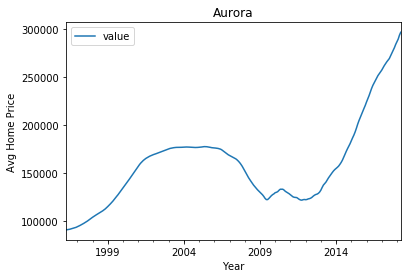

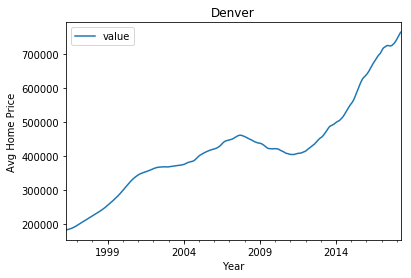

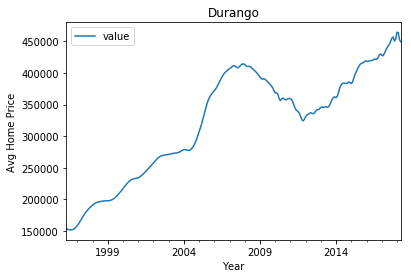

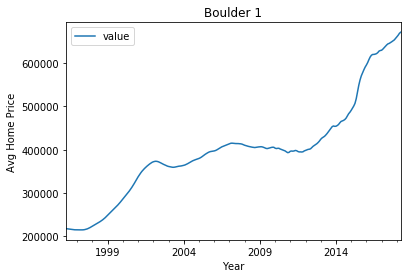

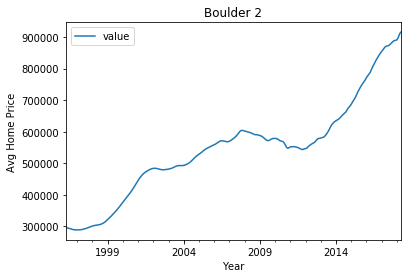

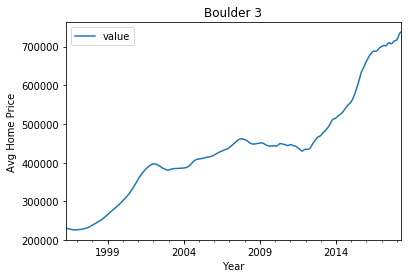

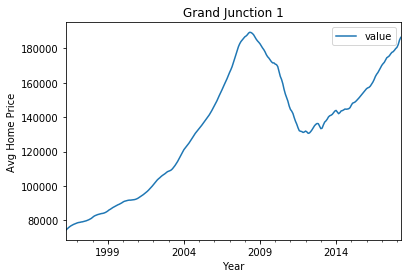

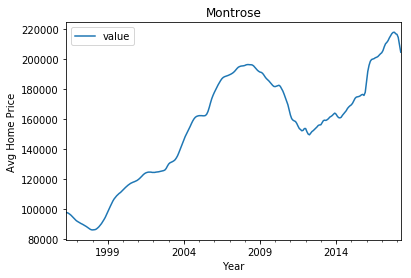

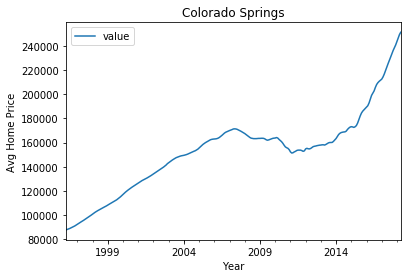

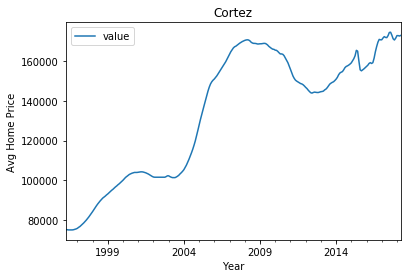

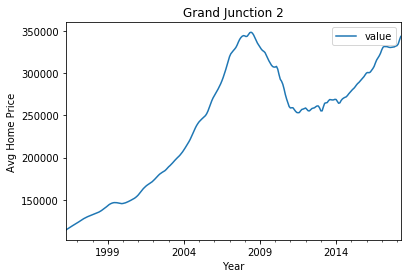

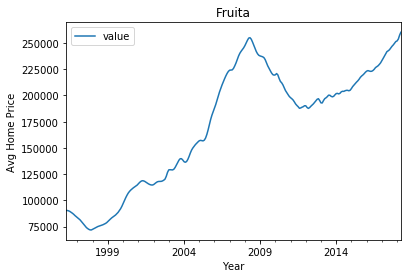

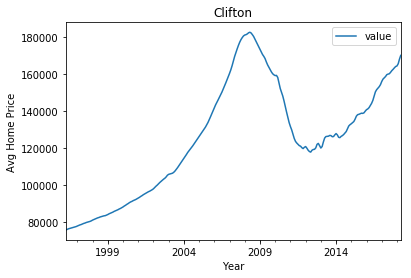

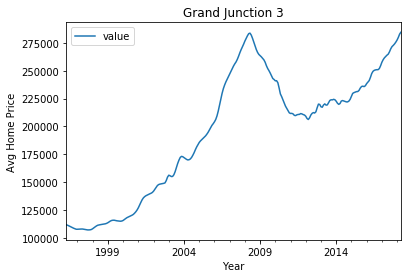

In [216]:
melted_aurora.plot()
plt.title("Aurora")
plt.xlabel("Year")
plt.ylabel("Avg Home Price")

melted_denver.plot()
plt.title("Denver")
plt.xlabel("Year")
plt.ylabel("Avg Home Price")

melted_durango.plot()
plt.title("Durango")
plt.xlabel("Year")
plt.ylabel("Avg Home Price")

melted_boulder_1.plot()
plt.title("Boulder 1")
plt.xlabel("Year")
plt.ylabel("Avg Home Price")

melted_boulder_2.plot()
plt.title("Boulder 2")
plt.xlabel("Year")
plt.ylabel("Avg Home Price")

melted_boulder_3.plot()
plt.title("Boulder 3")
plt.xlabel("Year")
plt.ylabel("Avg Home Price")

melted_grand_junction_1.plot()
plt.title("Grand Junction 1")
plt.xlabel("Year")
plt.ylabel("Avg Home Price")

melted_montrose.plot()
plt.title("Montrose")
plt.xlabel("Year")
plt.ylabel("Avg Home Price")

melted_colorado_springs.plot()
plt.title("Colorado Springs")
plt.xlabel("Year")
plt.ylabel("Avg Home Price")

melted_cortez.plot()
plt.title("Cortez")
plt.xlabel("Year")
plt.ylabel("Avg Home Price")

melted_grand_junction_2.plot()
plt.title("Grand Junction 2")
plt.xlabel("Year")
plt.ylabel("Avg Home Price")

melted_fruita.plot()
plt.title("Fruita")
plt.xlabel("Year")
plt.ylabel("Avg Home Price")

melted_clifton.plot()
plt.title("Clifton")
plt.xlabel("Year")
plt.ylabel("Avg Home Price")

melted_grand_junction_3.plot()
plt.title("Grand Junction 3")
plt.xlabel("Year")
plt.ylabel("Avg Home Price")

# Step 5: ARIMA Modeling

In [191]:
#split into train and test
aurora_train_size = int(len(melted_aurora)*.66)
aurora_train, aurora_test = melted_aurora[0:aurora_train_size], melted_aurora[aurora_train_size:]

In [192]:
denver_train_size = int(len(melted_denver)*.66)
denver_train, denver_test = melted_denver[0:denver_train_size], melted_denver[denver_train_size:]

In [193]:
durango_train_size = int(len(melted_durango)*.66)
durango_train, durango_test = melted_durango[0:durango_train_size], melted_durango[durango_train_size:]

In [194]:
boulder_1_train_size = int(len(melted_boulder_1)*.66)
boulder_1_train, boulder_1_test = melted_boulder_1[0:boulder_1_train_size], melted_boulder_1[boulder_1_train_size:]

In [195]:
boulder_2_train_size = int(len(melted_boulder_2)*.66)
boulder_2_train, boulder_2_test = melted_boulder_2[0:boulder_2_train_size], melted_boulder_2[boulder_2_train_size:]

In [196]:
boulder_3_train_size = int(len(melted_boulder_3)*.66)
boulder_3_train, boulder_3_test = melted_boulder_3[0:boulder_3_train_size], melted_boulder_3[boulder_3_train_size:]

In [197]:
grand_junction_1_train_size = int(len(melted_grand_junction_1)*.66)
grand_junction_1_train, grand_junction_1_test = melted_grand_junction_1[0:grand_junction_1_train_size], melted_grand_junction_1[grand_junction_1_train_size:]

In [198]:
montrose_train_size = int(len(melted_montrose)*.66)
montrose_train, montrose_test = melted_montrose[0:montrose_train_size], melted_montrose[montrose_train_size:]

In [199]:
colorado_springs_train_size = int(len(melted_aurora)*.66)
colorado_springs_train, colorado_springs_test = melted_colorado_springs[0:colorado_springs_train_size], melted_colorado_springs[colorado_springs_train_size:]

In [200]:
cortez_train_size = int(len(melted_cortez)*.66)
cortez_train, cortez_test = melted_cortez[0:cortez_train_size], melted_cortez[cortez_train_size:]

In [201]:
grand_junction_2_train_size = int(len(melted_grand_junction_2)*.66)
grand_junction_2_train, grand_junction_2_test = melted_grand_junction_2[0:grand_junction_2_train_size], melted_grand_junction_2[grand_junction_2_train_size:]

In [202]:
fruita_train_size = int(len(melted_fruita)*.66)
fruita_train, fruita_test = melted_fruita[0:fruita_train_size], melted_fruita[fruita_train_size:]

In [203]:
clifton_train_size = int(len(melted_clifton)*.66)
clifton_train, clifton_test = melted_clifton[0:clifton_train_size], melted_clifton[clifton_train_size:]

# Run ARIMA predictions, determine proper order 

In [175]:
def arima(data, arima_order):
    train_size = int(len(data)*.66)
    train, test = data[0:train_size], data[train_size:]
    history = [x for x in train]
    
    predictions = []
    for x in range(len(test)):
        model = ARIMA(len(test))
        model_fit = model.fit(disp = 0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[x])
    error = mean_squared_errror(test, predictions)
    return error

In [176]:
#run ARIMA order code
def arima_order(dataset, p_values, d_values, q_values):
    best_score, best_cfg = float('inf'), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    mse = arima(dataset, order)
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                    print('ARIMA%s MSE=%.3f' % (order,mse))
                except: 
                    continue
        print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))
    

In [218]:
aurora_test.head()

,value
time,
2010-10-01,129800.0
2010-11-01,129000.0
2010-12-01,128100.0
2011-01-01,127000.0
2011-02-01,125900.0


In [178]:
p_values = [0,1,2,4,6,8,10]
d_values = range(0,3)
q_values = range(0,3)

In [183]:
#run ARIMA
import warnings
warnings.filterwarnings("ignore")
arima_order(aurora_test, p_values, d_values, q_values)

Best ARIMANone MSE=inf
Best ARIMANone MSE=inf
Best ARIMANone MSE=inf
Best ARIMANone MSE=inf
Best ARIMANone MSE=inf
Best ARIMANone MSE=inf
Best ARIMANone MSE=inf


In [ ]:
#predictions
arima(aurora_train, )

In [ ]:
arima_order(denver_train)
arima(denver_train)

In [ ]:
arima_order(durango_train)
arima(durango_train)

In [ ]:
arima_order(boulder_1_train)
arima(boulder_1_train)

In [ ]:
arima_order(boulder_2_train)
arima(boulder_2_train)

In [ ]:
arima_order(boulder_3_train)
arima(boulder_3_train)

In [ ]:
arima_order(grand_junction_1_train)
arima(grand_junction_1_train)

In [ ]:
arima_order(montrose_train)
arima(montrose_train)

In [ ]:
arima_order(colorado_springs_train)
arima(colorado_springs_train)

In [ ]:
arima_order(cortez_train)
arima(cortez_train)

In [ ]:
arima_order(grand_junction_2_train)
arima(grand_junction_2_train)

In [ ]:
arima_order(fruita_train)
arima(fruita_train)

In [ ]:
arima_order(clifton_train)
arima(clifton_train)

In [ ]:
arima_order(grand_junction_3_train)
arima(grand_junction_3_train)

In [ ]:
#evaluate against test

In [ ]:
#calculate ROI

In [ ]:
#profit$$$

# Step 6: Interpreting Results

In [ ]:
#look at prediction of home value, decide which will be best to invest in. 
#percent increase/decrease 5 years from now vs. today. 